In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [5]:
# Loading datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Drop random column
train = train.drop(columns = 'Unnamed: 0')

# Changing the values of the response variable
train['readmitted'] = train['readmitted'].replace(-1, 0)
test['readmitted'] = test['readmitted'].replace(-1, 0)

In [7]:
# Var correlations with response
train.corrwith(train.readmitted).sort_values()

encounter_id               -0.047242
admission_type_id          -0.000676
num_procedures             -0.000602
patient_nbr                 0.005413
admission_source_id         0.006628
number_outpatient           0.008756
discharge_disposition_id    0.012361
number_emergency            0.028140
num_lab_procedures          0.030521
num_medications             0.038162
age                         0.043170
number_diagnoses            0.044125
time_in_hospital            0.053276
number_inpatient            0.100942
readmitted                  1.000000
dtype: float64

In [23]:
# Most correlated variables
vars_list = np.array(["number_inpatient", "time_in_hospital", "number_diagnoses", "age", "encounter_id", "num_medications", "num_lab_procedures"])

(7,)

In [1]:
'''# Doesn't work (sad)
fig, axes = plt.subplots(2,8, figsize = (16,10))
plt.subplots_adjust(wspace = 0.2)

j = 0 
for i in range(7):
    if i > 4:
        j = 1
    x = vars_list[i]
    sns.histplot(x = x, data = train, ax = axes[j, i])
    sns.boxplot(x = x, y = "readmitted", data = train, ax = axes[j, i])
    '''

'# Doesn\'t work (sad)\nfig, axes = plt.subplots(2,8, figsize = (16,10))\nplt.subplots_adjust(wspace = 0.2)\n\nj = 0 \nfor i in range(7):\n    if i > 4:\n        j = 1\n    x = vars_list[i]\n    sns.histplot(x = x, data = train, ax = axes[j, i])\n    sns.boxplot(x = x, y = "readmitted", data = train, ax = axes[j, i])\n    '

In [6]:
# Defining function to make exploratory plots (histogram distribution, boxplot)

def plot_dist(var):
    fig, axes = plt.subplots(1,2, figsize = (6, 3))
    plt.subplots_adjust(wspace = 0.2)

    sns.histplot(x = var, data = train, ax = axes[0])
    sns.boxplot(x = var, y = "readmitted", data = train, ax = axes[1])

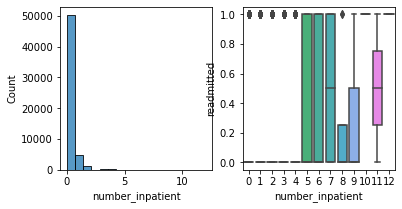

In [7]:
plot_dist("number_inpatient")

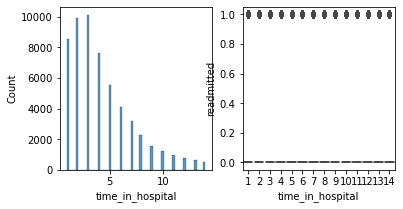

In [8]:
plot_dist("time_in_hospital")

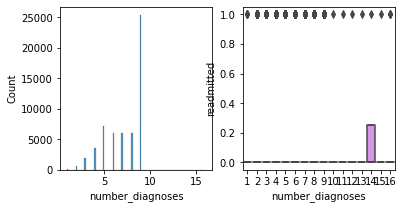

In [9]:
plot_dist("number_diagnoses")

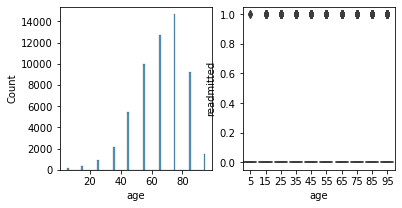

In [10]:
plot_dist("age")

In [ ]:
plot_dist("encounter_id")

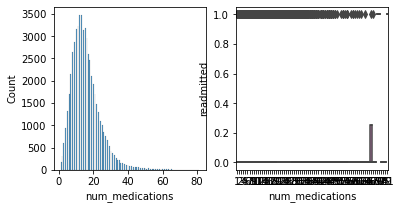

In [23]:
plot_dist("num_medications")

(40.0, 80.0)

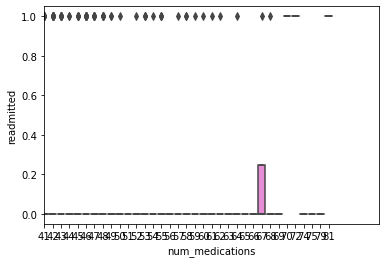

In [45]:
a = sns.boxplot(x = "num_medications", y = "readmitted", data = train)
a.set_xlim(40, 80)

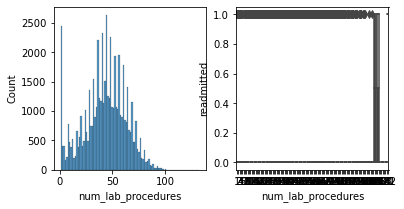

In [24]:
plot_dist("num_lab_procedures")

(90.0, 115.0)

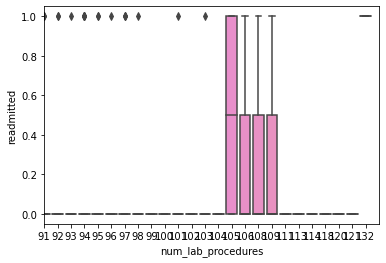

In [40]:
a = sns.boxplot(x = "num_lab_procedures", y = "readmitted", data = train)
a.set_xlim(90, 115)